**Author:** Elias Rafael Ruiz-Morales

**Institution:** Wellcome Sanger institute

**September, 2023**


---

# Generation of a clean object for databases


In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import os
import sys
import anndata

import matplotlib.pyplot as plt
import matplotlib as mpl


In [2]:
#adata_ExplantNorm=sc.read('../results/scVI/S9_scVIintegrated_fetalSurgSubset_adata_latent20_20220523.h5ad')

In [3]:
def MovePlots(plotpattern, subplotdir):
    os.system('mkdir -p '+str(sc.settings.figdir)+'/'+subplotdir)
    os.system('mv '+str(sc.settings.figdir)+'/*'+plotpattern+'** '+str(sc.settings.figdir)+'/'+subplotdir)

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.figdir = '../results/images/annotationFine/'
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80)  # low dpi (dots per inch) yields small inline figures

sys.executable

-----
anndata     0.7.5
scanpy      1.7.1
sinfo       0.3.1
-----
PIL                 8.1.2
anndata             0.7.5
anyio               NA
attr                20.3.0
babel               2.9.0
backcall            0.2.0
brotli              NA
cairo               1.20.0
certifi             2020.12.05
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.6.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
cytoolz             0.11.0
dask                2021.03.1
dateutil            2.8.1
decorator           4.4.2
fsspec              0.8.7
get_version         2.1
google              NA
h5py                3.1.0
idna                2.10
igraph              0.8.3
ipykernel           5.5.0
ipython_genutils    0.2.0
jedi                0.18.0
jinja2              2.11.3
joblib              1.0.1
json5               NA
jsonschema          3.2.0
jupyter_server      1.4.1
jupyterlab_server   2.3.0
kiwisolver          1.3.1
legacy_api_wrap     0.0.0


'/opt/conda/bin/python'

In [4]:
Trophoblasts= sc.read('../results/scVI/snRNA5_scVIintegrated_latent30_TrophoblastsRaw_20230825.h5ad')

# Preparing object for cellxgene visualization

In [5]:
import scipy

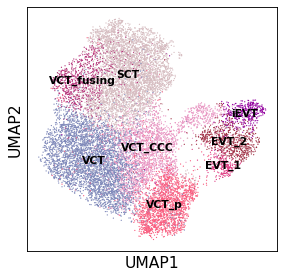

In [6]:
sc.pl.umap(Trophoblasts, color=['cell_type'], size=5,
            title='', legend_loc='on data',legend_fontsize='x-small')

In [12]:
Trophoblasts.obs['sample']

Pla_HDBR11923126_AAACCCATCGTCTACC    Pla_HDBR11923126
Pla_HDBR11923126_AAACGAATCGCAACAT    Pla_HDBR11923126
Pla_HDBR11923126_AAACGCTTCGGCACTG    Pla_HDBR11923126
Pla_HDBR11923126_AAAGAACAGCAGTACG    Pla_HDBR11923126
Pla_HDBR11923126_AAAGAACGTCCATAGT    Pla_HDBR11923126
                                           ...       
Pla_HDBR13026233_TTTGTTGAGAAACTGT    Pla_HDBR13026233
Pla_HDBR13026233_TTTGTTGAGAACGCGT    Pla_HDBR13026233
Pla_HDBR13026233_TTTGTTGAGTCGCCCA    Pla_HDBR13026233
Pla_HDBR13026233_TTTGTTGCAACTCATG    Pla_HDBR13026233
Pla_HDBR13026233_TTTGTTGCAGGTCCGT    Pla_HDBR13026233
Name: sample, Length: 15100, dtype: category
Categories (6, object): ['Pla_HDBR11923126', 'Pla_HDBR11923127', 'Pla_HDBR13026230', 'Pla_HDBR13026231', 'Pla_HDBR13026232', 'Pla_HDBR13026233']

In [16]:
#Cleaning unused obsm
del(Trophoblasts.obsm['X_scVI_n_latent_15'])
del(Trophoblasts.obsm['X_scVI_n_latent_20'])
del(Trophoblasts.obsm['X_scVI_n_latent_30'])
del(Trophoblasts.obsm['X_scVI_n_latent_40'])
del(Trophoblasts.obsm['_scvi_extra_categoricals'])

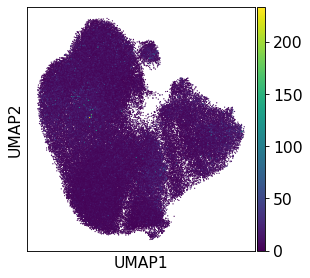

In [17]:
sc.pl.umap(Trophoblasts, color=['GATA3'], size=5,
            title='',legend_fontsize='x-small')

In [18]:
Trophoblasts

AnnData object with n_obs × n_vars = 98603 × 36601
    obs: 'sample', 'stage', 'donor', 'hpi', 'infection', 'percent_mito', 'n_counts', 'batch', 'n_genes', 'sample_barcode', 'assignment_SoC', 'donor_deconv', 'donor_souporcell', 'donor_id', 'scrublet_score', 'scrublet_cluster_score', 'zscore', 'bh_pval', 'bonf_pval', 'is_doublet', 'infection_stage', 'S_score', 'G2M_score', 'phase', 'n_genes_by_counts', 'total_counts', 'total_counts_hs', 'pct_counts_hs', 'total_counts_tg', 'pct_counts_tg', 'Tg_infected', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var', 'leiden_scvi', 'stage_perInfection', 'celltype_predictions', 'probabilities', 'cell_type', 'Identity-Stage'
    var: 'gene_ids', 'feature_types', 'mean-0', 'std-0', 'mean-1', 'std-1', 'mean-2', 'std-2', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'Tg_infected_colors', '_scvi', 'cell_type_colors', 'celltype_predictions_colors', 'donor_id_colors', 'hpi_colors', 'hvg', 'i

In [20]:
#Selecting useful metadata
Trophoblasts.obs= Trophoblasts.obs[['cell_type','n_counts','n_genes','percent_mito','stage','phase','donor_id','infection',
           'stage_perInfection','Tg_infected','hpi']]

#renaming this column
#Trophoblasts.obs= Trophoblasts.obs.rename(columns={"MFgenotype": "origin_M_F"})

#renaming this column
#Trophoblasts.obs= Trophoblasts.obs.rename(columns={"identity": "CellType"})

In [21]:
Trophoblasts.obs

,cell_type,n_counts,n_genes,percent_mito,stage,phase,donor_id,infection,stage_perInfection,Tg_infected,hpi
Pla_HDBR13038517_AAACCCAAGCCTGGAA,VCT,3892.0,1927,0.027492,UI_24h,G1,snDonor_Tg0,UI,UI_Tg_24h,False,24h
Pla_HDBR13038517_AAACGAATCACGAGGA,VCT,21132.0,3849,0.001562,UI_24h,G1,snDonor_Tg1,UI,UI_Tg_24h,False,24h
Pla_HDBR13038517_AAACGCTAGAAGGGAT,SCT,13977.0,4755,0.003720,UI_24h,G1,snDonor_Tg0,UI,UI_Tg_24h,False,24h
Pla_HDBR13038517_AAACGCTGTCTGTCCT,VCT,23604.0,6050,0.001483,UI_24h,S,snDonor_Tg1,UI,UI_Tg_24h,False,24h
Pla_HDBR13038517_AAAGAACAGAGCATCG,VCT_fusing,24906.0,4416,0.002088,UI_24h,S,snDonor_Tg0,UI,UI_Tg_24h,False,24h
...,...,...,...,...,...,...,...,...,...,...,...
Pla_HDBR13798228_TTTGTTGCAAAGGCAC,VCT,7264.0,3495,0.000413,Lm_24h,G1,Hrv236,Lm,Lm_24h,nan,24h
Pla_HDBR13798228_TTTGTTGCACGGATCC,SCT,4965.0,2588,0.000604,Lm_24h,S,Hrv236,Lm,Lm_24h,nan,24h
Pla_HDBR13798228_TTTGTTGCATTGTACG,VCT,4855.0,2074,0.000618,Lm_24h,G1,Hrv236,Lm,Lm_24h,nan,24h
Pla_HDBR13798228_TTTGTTGTCAGCGCAC,VCT_p,9037.0,4082,0.000443,Lm_24h,S,Hrv236,Lm,Lm_24h,nan,24h


In [22]:
#removing unnecessary metadata
del(Trophoblasts.uns)
del(Trophoblasts.obsp)

In [23]:
#Log-normalising the counts
sc.pp.normalize_total(Trophoblasts, target_sum=1e4)
sc.pp.log1p(Trophoblasts)

normalizing counts per cell
    finished (0:00:01)


In [24]:
Trophoblasts.X = scipy.sparse.csr_matrix(Trophoblasts.X)

In [25]:
Trophoblasts.obs.head(5)

,cell_type,n_counts,n_genes,percent_mito,stage,phase,donor_id,infection,stage_perInfection,Tg_infected,hpi
Pla_HDBR13038517_AAACCCAAGCCTGGAA,VCT,3892.0,1927,0.027492,UI_24h,G1,snDonor_Tg0,UI,UI_Tg_24h,False,24h
Pla_HDBR13038517_AAACGAATCACGAGGA,VCT,21132.0,3849,0.001562,UI_24h,G1,snDonor_Tg1,UI,UI_Tg_24h,False,24h
Pla_HDBR13038517_AAACGCTAGAAGGGAT,SCT,13977.0,4755,0.003720,UI_24h,G1,snDonor_Tg0,UI,UI_Tg_24h,False,24h
Pla_HDBR13038517_AAACGCTGTCTGTCCT,VCT,23604.0,6050,0.001483,UI_24h,S,snDonor_Tg1,UI,UI_Tg_24h,False,24h
Pla_HDBR13038517_AAAGAACAGAGCATCG,VCT_fusing,24906.0,4416,0.002088,UI_24h,S,snDonor_Tg0,UI,UI_Tg_24h,False,24h


In [26]:
Trophoblasts.write('../results/scVI/placentaInfection_SingleNucleiTrophoblasts_lognorm_20230228.h5ad')

In [27]:
Trophoblasts

AnnData object with n_obs × n_vars = 98603 × 36601
    obs: 'cell_type', 'n_counts', 'n_genes', 'percent_mito', 'stage', 'phase', 'donor_id', 'infection', 'stage_perInfection', 'Tg_infected', 'hpi'
    var: 'gene_ids', 'feature_types', 'mean-0', 'std-0', 'mean-1', 'std-1', 'mean-2', 'std-2', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: 'log1p'
    obsm: 'X_umap'
    layers: 'raw_counts'

In [ ]:
sc.pl.umap(Trophoblasts, color=['cell_type'], size=5,
            title='', legend_loc='on data',legend_fontsize='x-small')